In [68]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import warnings 
warnings.filterwarnings("ignore")




In [4]:
df=pd.read_csv('skyserver.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [7]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [8]:
#check class unique
df['class'].unique()
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

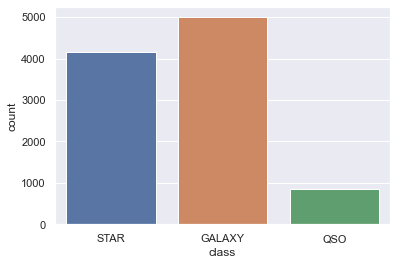

In [9]:
sns.countplot(df['class'])

In [10]:
df.replace('?',np.nan)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [11]:
df.isnull().values.any()




False

In [12]:
#Now our data is ready for visualization without any missing values
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [13]:
#Encoding the class/target labels object to int
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
df['class']=label_encoder.fit_transform(df['class'])
df['class'].unique()


array([2, 0, 1])

"0" means GALAXY    
"1" means QSO
"2" means star


0    4998
2    4152
1     850
Name: class, dtype: int64

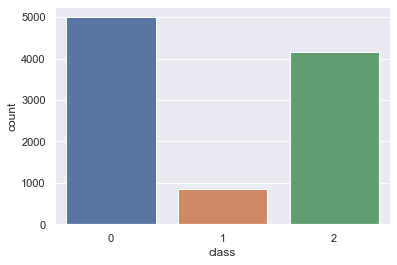

In [14]:
sns.countplot(df['class'])
df['class'].value_counts()

In [15]:
df.shape

(10000, 18)

In [16]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


In [17]:
df.drop(['rerun'],axis=1, inplace=True)
df.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512


In [18]:

df_cor=df.corr()
df_cor

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,1.921887e-15,5.938881e-16,-1.829075e-15,-3.355500e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,-6.293831e-03,5.946996e-01,-9.532711e-02,-4.321896e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,1.146139e-01,-1.314714e-01,8.834533e-02,-5.891815e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,9.944672e-03,8.547880e-03,-1.294293e-01,-2.690437e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,1.022304e-02,1.465110e-02,-5.497908e-02,-9.921163e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,1.074725e-02,1.713294e-02,1.978831e-02,4.962769e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,1.346079e-02,1.978147e-02,7.295994e-02,1.467908e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,1.092981e-02,1.824845e-02,1.123981e-01,2.157584e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,1.518143e-01,-4.638975e-01,9.360436e-02,-7.816172e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
camcol,1.921887e-15,-6.293831e-03,1.146139e-01,9.944672e-03,1.022304e-02,1.074725e-02,1.346079e-02,1.092981e-02,1.518143e-01,1.000000e+00,-6.792055e-02,4.080943e-02,-6.185920e-03,6.833537e-03,4.079461e-02,2.628396e-02,5.356292e-01


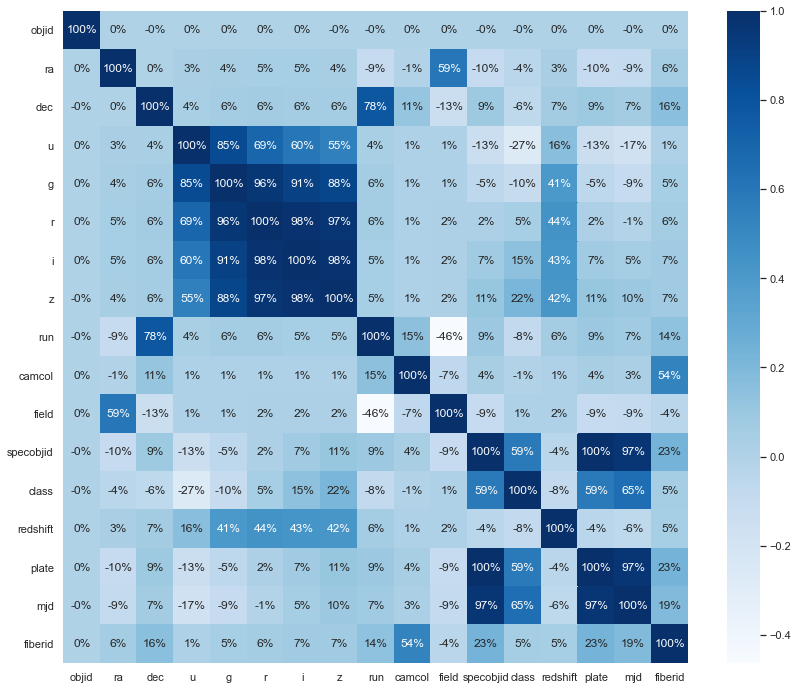

In [19]:
plt.figure(figsize=(14,12))
sns.heatmap(df_cor,annot=True, fmt='.0%', cmap='Blues')
plt.show()

Text(0.5, 1.0, 'correlation with target variable')

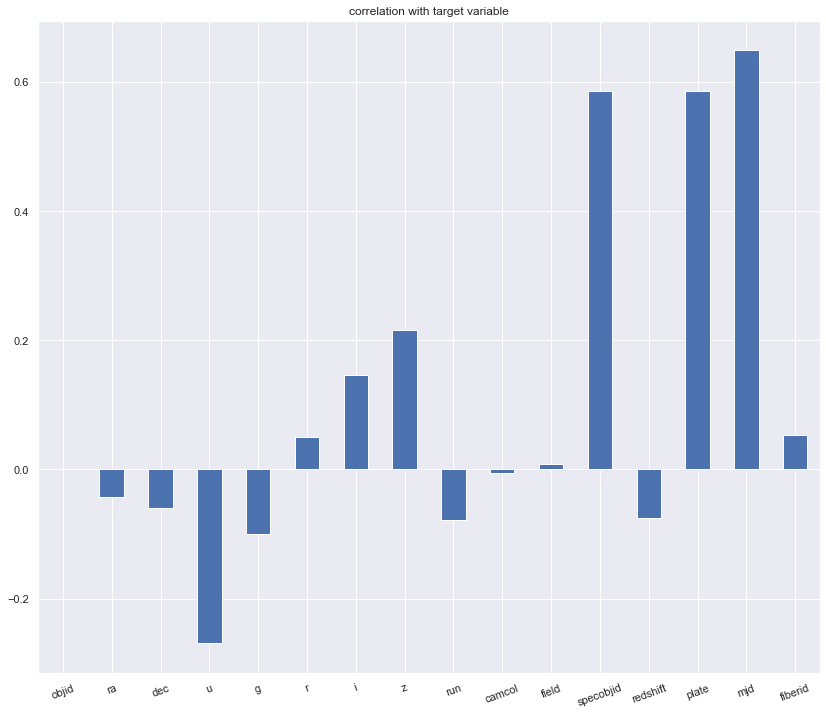

In [20]:
plt.figure(figsize=(14,12))
df.drop('class', axis=1).corrwith(df['class']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

Observation:
    1. objid, ra, dec, u, g, run,camcol,redshift are negatively correlated with target variable class.
    2. mjd is highly correlated with target variable.

Text(0.5, 1.0, 'Qso')

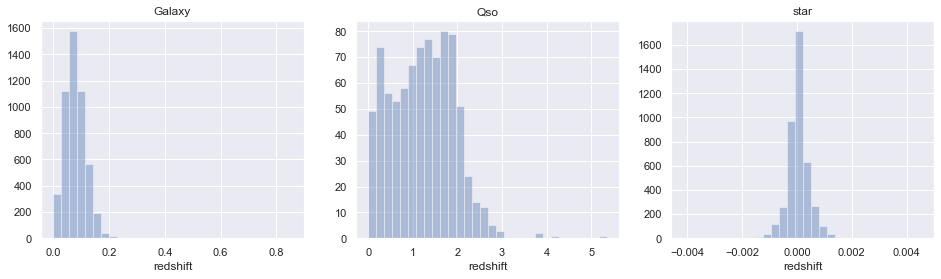

In [21]:
#Univariate Analysis

fig, axes= plt.subplots(nrows=1, ncols=3, figsize=(16,4))
ax= sns.distplot(df[df['class']==2].redshift, bins= 30, ax=axes[2], kde=False)
ax.set_title('star')
ax=sns.distplot(df[df['class']==0].redshift, bins=30, ax=axes[0], kde=False)
ax.set_title('Galaxy')
ax=sns.distplot(df[df['class']==1].redshift, bins=30, ax=axes[1], kde=False)
ax.set_title('Qso')


Text(0.5, 1.0, 'dec')

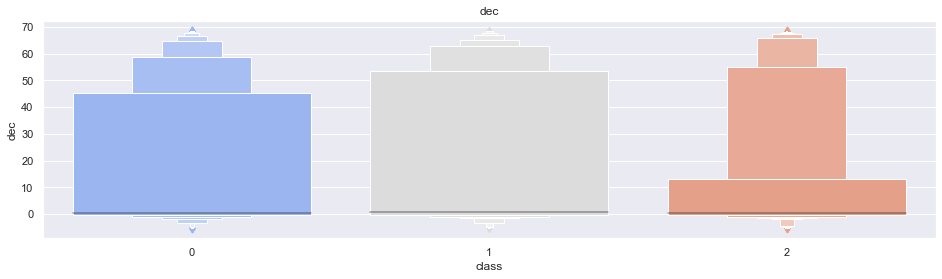

In [22]:
fig, axes= plt.subplots(nrows=1, ncols=1, figsize=(16,4))
ax= sns.lvplot(x=df['class'], y=df['dec'],palette='coolwarm')
ax.set_title('dec')

Text(0.5, 1.0, 'star')

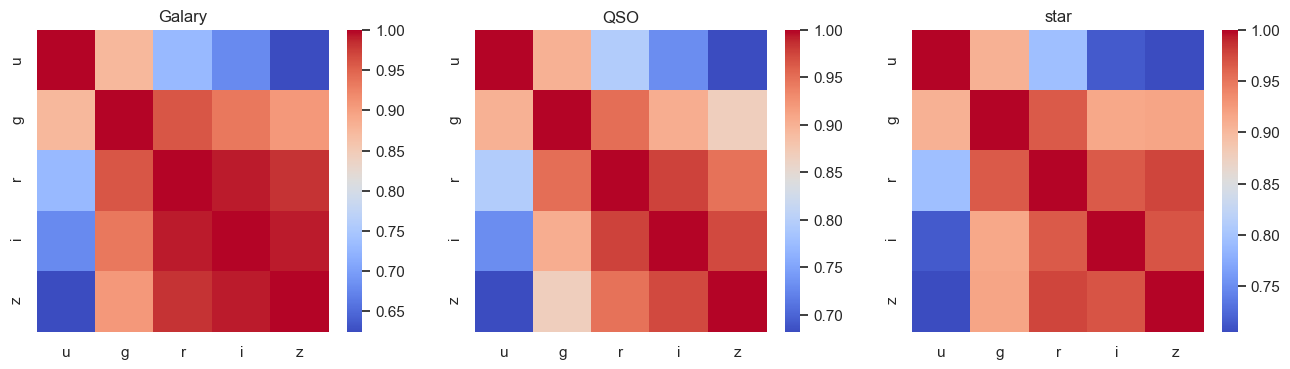

In [23]:
fig, axes= plt.subplots(nrows=1, ncols=3, figsize=(16,4))
fig.set_dpi(100)
ax= sns.heatmap(df[df['class']==0][['u', 'g', 'r', 'i', 'z']].corr(), ax=axes[0], cmap='coolwarm')
ax.set_title('Galary')
ax= sns.heatmap(df[df['class']==1][['u', 'g', 'r', 'i', 'z']].corr(), ax=axes[1], cmap='coolwarm')
ax.set_title('QSO')
ax= sns.heatmap(df[df['class']==2][['u', 'g', 'r', 'i', 'z']].corr(), ax=axes[2], cmap='coolwarm')
ax.set_title('star')


In [24]:
# Checking Skewness
df.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

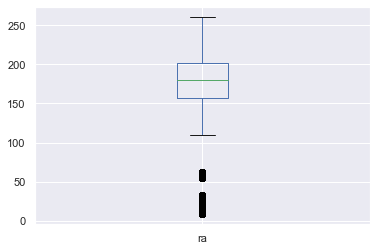

In [25]:
df['ra'].plot.box()

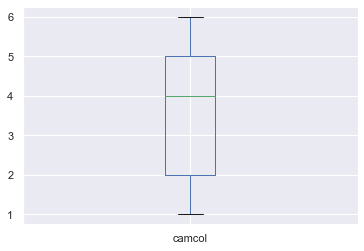

In [26]:
df['camcol'].plot.box()

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[       nan, 0.16745842, 0.58492272, ..., 1.03148936, 1.30931064,
        0.66863177],
       [       nan, 0.16886159, 0.58311429, ..., 0.63621258, 0.87919741,
        0.91101156],
       [       nan, 0.17057433, 0.58347525, ..., 0.65633905, 0.60919097,
        0.77527888],
       ...,
       [       nan, 0.92039468, 1.46090664, ..., 3.26608697, 2.69309363,
        1.3036668 ],
       [       nan, 0.92197294, 1.46432109, ..., 0.56688806, 0.70581092,
        0.60143828],
       [       nan, 0.91804124, 1.46639319, ..., 0.56688806, 0.70581092,
        0.5820479 ]])

In [28]:
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9994, 9997, 9997], dtype=int64), array([13, 13, 13, ..., 14, 11, 14], dtype=int64))


In [29]:
new_df=df[(z<3).all(axis=1)]

In [30]:
#checking the shape
print(df.shape,'\t', new_df.shape)

(10000, 17) 	 (0, 17)


In [31]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512


Model Training

In [32]:
#spliting the data into input and output variables
x=df.drop(columns=['class','objid'],axis=1)
x.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512


In [33]:
y=df['class']
y.head()

0    2
1    2
2    0
3    2
4    2
Name: class, dtype: int32

In [34]:
x.shape

(10000, 15)

In [35]:
y.shape

(10000,)

In [36]:
#scaling in input variable
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x=ms.fit_transform(x)

In [37]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=20,random_state=42, stratify=y)

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing error metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [39]:
#using gridsearchcv to find out the best parameter in KNeighborsClassifier
parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf= GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 22}


In [40]:
#models with its best parameter
knn=KNeighborsClassifier(n_neighbors=24)
svc=SVC()

In [41]:
model=[GaussianNB(),svc,DecisionTreeClassifier(),knn]

for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        print('Accuracy score of',m,'is:')
        print(accuracy_score(y_test,predm))
        print(confusion_matrix(y_test,predm))
        print(classification_report(y_test,predm))
        print('*******************************************************************************')
        print('\n')

Accuracy score of GaussianNB() is:
0.9
[[9 1 0]
 [0 2 0]
 [1 0 7]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.67      1.00      0.80         2
           2       1.00      0.88      0.93         8

    accuracy                           0.90        20
   macro avg       0.86      0.92      0.88        20
weighted avg       0.92      0.90      0.90        20

*******************************************************************************


Accuracy score of SVC() is:
0.9
[[9 0 1]
 [0 2 0]
 [1 0 7]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       1.00      1.00      1.00         2
           2       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.92      0.92      0.92        20
weighted avg       0.90      0.90      0.90        20

*****************************

In [42]:
#cross validate the model
model=[GaussianNB(),svc,DecisionTreeClassifier(),knn]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model:',m)
    print('score:',score.mean())
    print('Standard deviation:', score.std())
    print('**********************************************************************************')
    print('\n')

Model: GaussianNB()
score: 0.9410000000000001
Standard deviation: 0.022387496510329133
**********************************************************************************


Model: SVC()
score: 0.9054
Standard deviation: 0.025745679249147814
**********************************************************************************


Model: DecisionTreeClassifier()
score: 0.9827
Standard deviation: 0.005158488150611576
**********************************************************************************


Model: KNeighborsClassifier(n_neighbors=24)
score: 0.8509
Standard deviation: 0.03341391925530436
**********************************************************************************




Above all models DecisionTreeClassifier is giving best score.
Now we use some boosting technique to boostup our score.
After that we decie that which model is best

In [43]:
#Using Ensemble Technique to boostup our score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [44]:
#All Algorithm by using for loop
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*******************************************************************************')
    print('\n')
        
        

Accuracy score of RandomForestClassifier() is:
1.0
[[10  0  0]
 [ 0  2  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

*******************************************************************************


Accuracy score of AdaBoostClassifier() is:
0.95
[[10  0  0]
 [ 0  2  0]
 [ 1  0  7]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      1.00      1.00         2
           2       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.97      0.96      0.96        20
weighted avg       0.95      0.95     

In [45]:
#Cross validation the boosting model
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model:',m)
    print('score:',score.mean())
    print('Standard deviation:', score.std())
    print('**********************************************************************************')
    print('\n')

Model: RandomForestClassifier()
score: 0.9884999999999999
Standard deviation: 0.003232645975048926
**********************************************************************************


Model: AdaBoostClassifier()
score: 0.8583000000000001
Standard deviation: 0.08583827817471644
**********************************************************************************


Model: GradientBoostingClassifier()
score: 0.9869999999999999
Standard deviation: 0.002720294101747091
**********************************************************************************


Model: BaggingClassifier()
score: 0.9875999999999999
Standard deviation: 0.0029051678092667926
**********************************************************************************


Model: ExtraTreesClassifier()
score: 0.9737
Standard deviation: 0.00846226919921602
**********************************************************************************




In [49]:
#GradientBoostingClassifier with best result
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))
    

1.0
[[10  0  0]
 [ 0  2  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



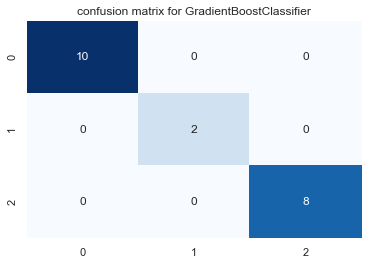

In [50]:
#plotting confusion matrix for gradient boost classifier
cm=confusion_matrix(y_test,predgbc)
sns.heatmap(cm,annot=True, cbar=False, cmap='Blues')

plt.title('confusion matrix for GradientBoostClassifier')
plt.show()


In [3]:
#saving the model

import joblib



In [ ]:
  
# Save the model as a pickle in a file 
joblib.dump(predgbc, 'Sky_server.pkl') 

